In [1]:
!pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=25391cc4179da0c8e6f29ac3bfa048ce5459aa39069ab0a9c460155f6e7d95b5
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


In [14]:
from minisom import MiniSom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [11]:
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result

In [ ]:
#Emoji Data

In [40]:
data = np.loadtxt("/content/emojis.txt") 
x = data[:,1:]
y = data[:,0]

In [41]:
x.shape

(2470, 1024)

Here, we train the data and build the map.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y)

som = MiniSom(32, 32, 1024, sigma=3, learning_rate=0.75, 
              neighborhood_function='triangle')
som.pca_weights_init(X_train)
som.train_random(X_train, 5000, verbose=False)

print(classification_report(y_test, classify(som, X_test)))

              precision    recall  f1-score   support

         1.0       0.55      0.54      0.55       100
         2.0       0.41      0.40      0.40       102
         3.0       1.00      0.97      0.98       101
         4.0       0.40      0.43      0.41        91
         5.0       0.42      0.42      0.42       100

    accuracy                           0.55       494
   macro avg       0.56      0.55      0.55       494
weighted avg       0.56      0.55      0.56       494



We can see a visualization of how the Emoji data was separated, but...

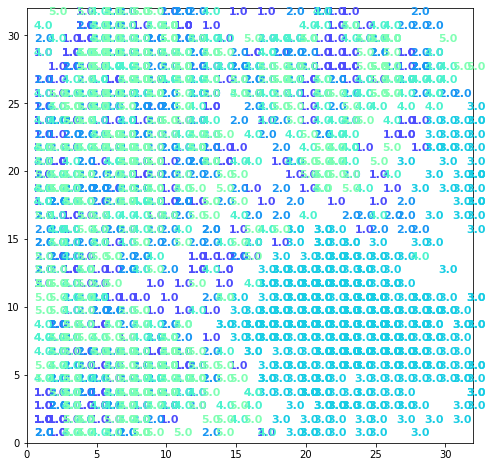

In [51]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for i, t in zip(x, y):  # scatterplot
    w = som.winner(i)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

This looks a bit better!

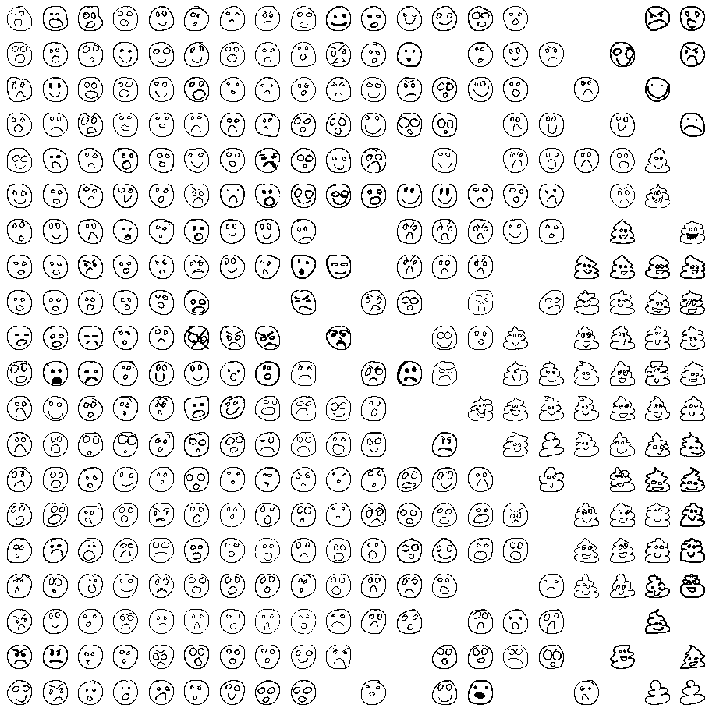

In [52]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
  for i in range(20):
    plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
    if (i, j) in wmap:
      plt.imshow(x[wmap[(i,j)]].reshape(32,32), cmap='Greys', interpolation='nearest')
    else:
        plt.imshow(np.zeros((8, 8)),  cmap='Greys')
    cnt = cnt + 1
plt.tight_layout()
plt.show()

#Fashion-MNIST Data

In [26]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')
new_train = train.drop(columns=['label'])
new_test = test.drop(columns=['label'])
som_data = pd.concat([new_train, new_test], ignore_index=True).values
labels = pd.concat([train['label'], test['label']], ignore_index=True).values

In [27]:
labels.shape

(70000,)

In [28]:
som_data.shape

(70000, 784)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(som_data,labels, test_size=0.2)

som = MiniSom(28, 28, 784, sigma=3, learning_rate=0.75, 
              neighborhood_function='triangle')
som.pca_weights_init(X_train)
som.train_random(X_train, 5000, verbose=False)

print(classification_report(y_test, classify(som, X_test)))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75      1369
           1       0.97      0.93      0.95      1314
           2       0.63      0.65      0.64      1433
           3       0.80      0.82      0.81      1421
           4       0.63      0.63      0.63      1386
           5       0.90      0.84      0.87      1425
           6       0.53      0.45      0.49      1416
           7       0.85      0.88      0.86      1390
           8       0.92      0.94      0.93      1441
           9       0.88      0.92      0.90      1405

    accuracy                           0.78     14000
   macro avg       0.78      0.79      0.78     14000
weighted avg       0.78      0.78      0.78     14000



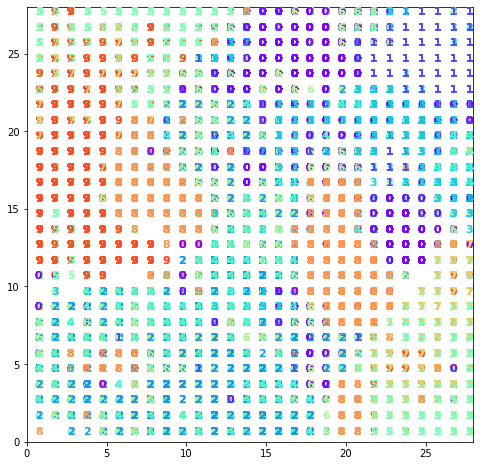

In [36]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for i, t in zip(som_data, labels):  # scatterplot
    w = som.winner(i)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

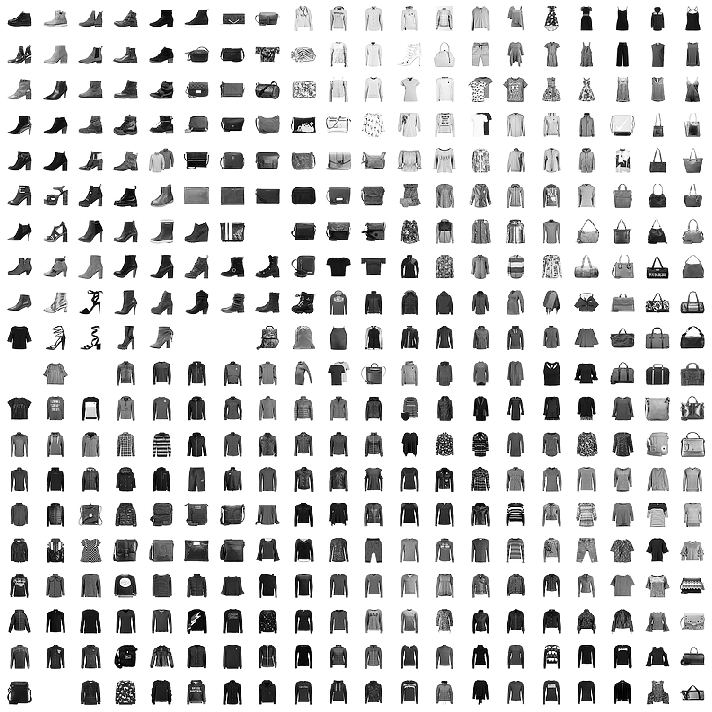

In [38]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
  for i in range(20):
    plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
    if (i, j) in wmap:
      plt.imshow(som_data[wmap[(i,j)]].reshape(28,28), cmap='Greys', interpolation='nearest')
    else:
        plt.imshow(np.zeros((8, 8)),  cmap='Greys')
    cnt = cnt + 1
plt.tight_layout()
plt.show()